## Task 1 and 2
Import data from csv file and set first column as index.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data1.csv', index_col=0)
df.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


## Task3
Plot all columns as time series.

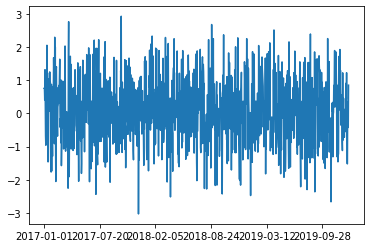

In [3]:
df['theta_1'].plot()

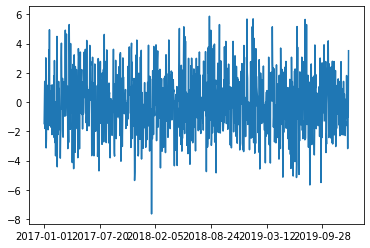

In [4]:
df['theta_2'].plot()

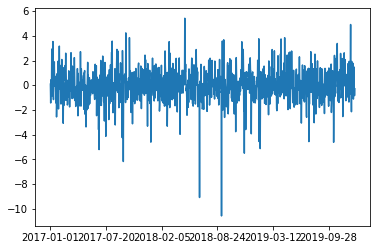

In [5]:
df['theta_3'].plot()

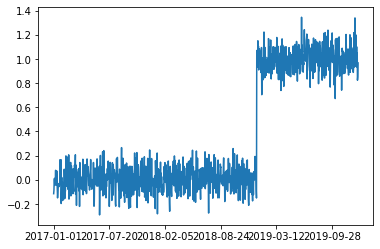

In [6]:
df['theta_4'].plot()

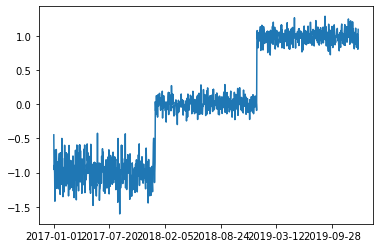

In [7]:
df['theta_5'].plot()

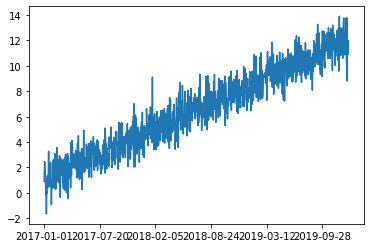

In [8]:
df['theta_6'].plot()

## Task 4
Plot all histograms on a single faceted plot.

In [9]:
df = pd.read_csv('Data1.csv')
df = df.rename(columns={'Unnamed: 0': "Date"})
melted_df = pd.melt(df, id_vars=['Date'],value_vars=['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'])
melted_df = melted_df.set_index('Date')
melted_df.head()

,variable,value
Date,,
2017-01-01,theta_1,0.756936
2017-01-02,theta_1,0.767089
2017-01-03,theta_1,0.404544
2017-01-04,theta_1,1.313957
2017-01-05,theta_1,0.209862


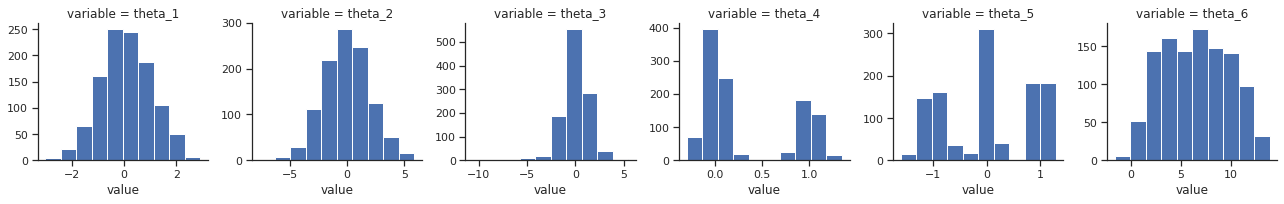

In [10]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt


g = sns.FacetGrid(melted_df, sharey=False, sharex=False, col='variable')
g = g.map(plt.hist, 'value', edgecolor="w")

Values of first 3 variables are located around 0. Variable theta_4 has 2 points where most of its values are located - 0 and 1. Variable theta_5 has 3 points -1, 0 and 1. Last variable values are condensated around 6-7.

## Task 5
Plots of KDEs for all columns.

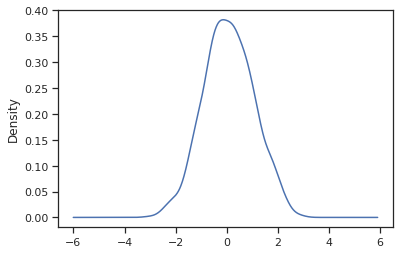

In [11]:
df['theta_1'].plot.kde()

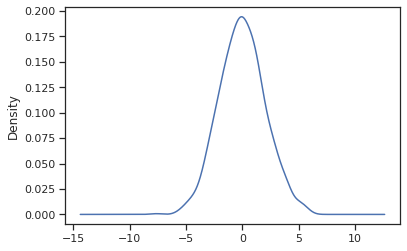

In [12]:
df['theta_2'].plot.kde()

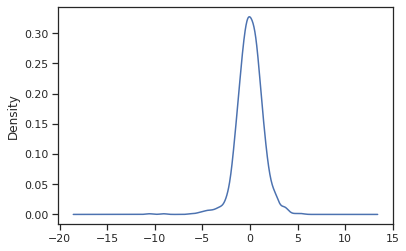

In [13]:
df['theta_3'].plot.kde()

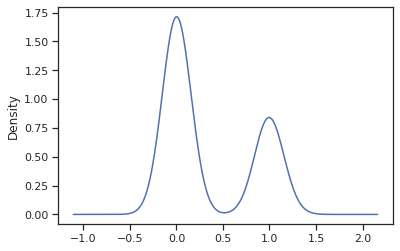

In [14]:
df['theta_4'].plot.kde()

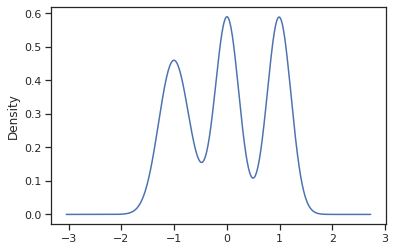

In [15]:
df['theta_5'].plot.kde()

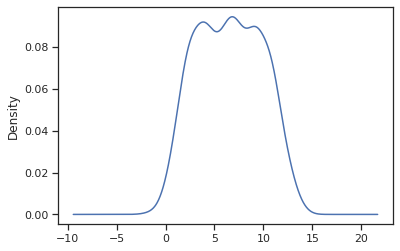

In [16]:
df['theta_6'].plot.kde()

After plotting KDEs it looks like, all of those variables were generated using normal distribution or with normalized sum of normal distributions with different parameters.

## Task 6
Analysis for columns theta_1-theta4 in 2018.

In [17]:
df = df.drop(columns=['theta_6', 'theta_5'])
df

,Date,theta_1,theta_2,theta_3,theta_4
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443
2,2017-01-03,0.404544,1.415887,0.443466,0.000200
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473
...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904


In [18]:
df['Date']= pd.to_datetime(df['Date']) 
df = df[df['Date'].dt.year == 2018]
df1 = df.set_index('Date')
df1.head()

,theta_1,theta_2,theta_3,theta_4
Date,,,,
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


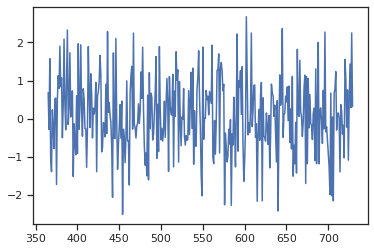

In [19]:
df['theta_1'].plot()

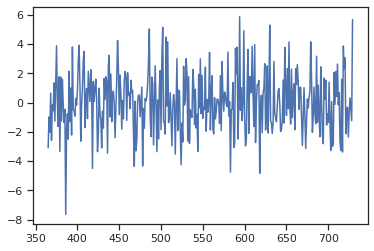

In [20]:
df['theta_2'].plot()

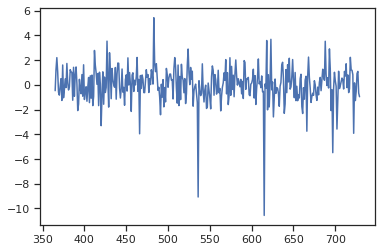

In [21]:
df['theta_3'].plot()

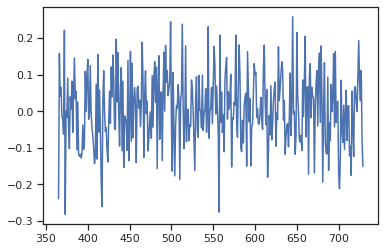

In [22]:
df['theta_4'].plot()

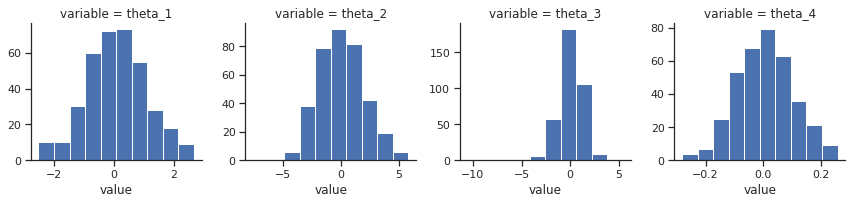

In [23]:
melted_df = pd.melt(df, id_vars=['Date'],value_vars=['theta_1', 'theta_2', 'theta_3', 'theta_4'])
melted_df = melted_df.set_index('Date')
melted_df.head()


g = sns.FacetGrid(melted_df, sharey=False, sharex=False, col='variable')
g = g.map(plt.hist, 'value', edgecolor="w")

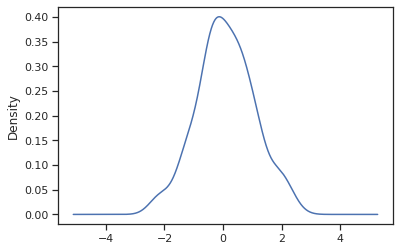

In [24]:
df['theta_1'].plot.kde()

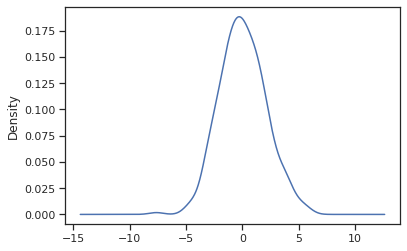

In [25]:
df['theta_2'].plot.kde()

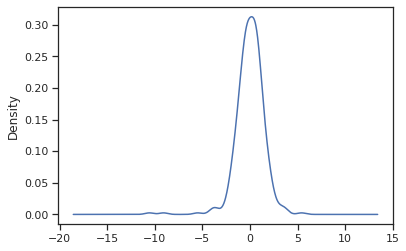

In [26]:
df['theta_3'].plot.kde()

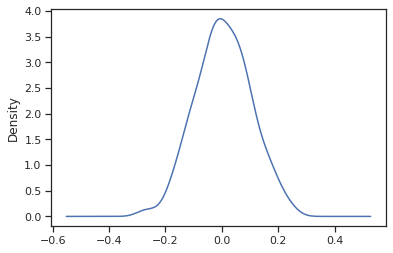

In [27]:
df['theta_4'].plot.kde()

Analysis of this subset shows similar results. Plots are a bit more ugly - less data causes them to be less smooth.